# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [96]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [97]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

**Problems with data** The data contains null. The number of rows should be for all 227 non-null but we can see that there's some null data.

In [98]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [99]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Null Data (UP to 6% data with null)         <br>
2- Decimal use comma separator          <br>
3- Data Types are not properly defined          <br>

In [100]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

**NB:** I will not follow same order mentioned here as the solving of some issues depend on others

**First**

Remove nulls from the data.

In [101]:
df_copy=df_copy.dropna()
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

Country                               0.0
Region                                0.0
Population                            0.0
Area (sq. mi.)                        0.0
Pop. Density (per sq. mi.)            0.0
Coastline (coast/area ratio)          0.0
Net migration                         0.0
Infant mortality (per 1000 births)    0.0
GDP ($ per capita)                    0.0
Literacy (%)                          0.0
Phones (per 1000)                     0.0
Arable (%)                            0.0
Crops (%)                             0.0
Other (%)                             0.0
Climate                               0.0
Birthrate                             0.0
Deathrate                             0.0
Agriculture                           0.0
Industry                              0.0
Service                               0.0
dtype: float64

**Second and Third issue**

In this section, I will solve two issues. The first is that float number issue. When I checked the CSV file I have found that it contains the decimal point with ',' separator not '.'. This can work if the PC culture is 'France', 'Germany',.... but as we deal with US-Culture we should replace them with '.'.

We handle another issue in this data which is the datatype. The decimal points columns should be float datatype not object.

In [102]:
#solution 
#ConvertToFloat and replace ',' with '.'
def FixFloatIssue(df_temp,colname):
    df_temp[[colname]]=([float(each.replace(',','.')) for each in df_temp[colname]])

In [103]:
#test 
FixFloatIssue(df_copy,'Pop. Density (per sq. mi.)')
FixFloatIssue(df_copy,'Coastline (coast/area ratio)')
FixFloatIssue(df_copy,'Net migration')
FixFloatIssue(df_copy,'Infant mortality (per 1000 births)')
FixFloatIssue(df_copy,'Literacy (%)')
FixFloatIssue(df_copy,'Phones (per 1000)')
FixFloatIssue(df_copy,'Arable (%)')
FixFloatIssue(df_copy,'Crops (%)')
FixFloatIssue(df_copy,'Other (%)')
FixFloatIssue(df_copy,'Climate')
FixFloatIssue(df_copy,'Birthrate')
FixFloatIssue(df_copy,'Deathrate')
FixFloatIssue(df_copy,'Agriculture')
FixFloatIssue(df_copy,'Industry')
FixFloatIssue(df_copy,'Service')

In [104]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [105]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-n

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [106]:
df_copy.iloc[:, 2:].head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [107]:
from sklearn import preprocessing

In [108]:
scaler = preprocessing.StandardScaler().fit(df_copy.iloc[:, 2:])
df_copy.iloc[:, 2:]=scaler.transform(df_copy.iloc[:, 2:])



In [109]:
df_copy.iloc[:, 2:].head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.024028,0.059865,-0.179430,-0.223601,4.910701,3.522194,-0.876112,-2.322517,-0.978132,-0.142612,-0.523177,0.379345,-1.594082,2.090732,2.093127,1.478239,-0.343260,-1.056306
1,-0.233132,-0.384720,-0.123741,-0.206521,-0.996948,-0.492940,-0.480984,0.230303,-0.653602,0.540543,-0.002583,-0.440148,1.280887,-0.706978,-0.817079,0.497583,-0.714908,0.148249
2,-0.009772,1.305948,-0.204294,-0.223059,-0.038722,-0.224035,-0.325013,-0.603787,-0.620672,-0.821955,-0.519459,0.932316,-1.594082,-0.526624,-0.934488,-0.370430,2.229691,-1.552656
6,-0.260288,-0.405302,-0.118288,0.587019,2.314628,-0.506839,-0.054663,0.659986,1.201943,-1.067464,-0.550447,1.148398,-0.156597,-0.790492,-0.793982,-0.774619,-0.772085,1.364910
7,-0.259865,-0.405057,-0.100913,0.244607,-1.254444,-0.551373,0.194892,0.356680,1.630990,0.318670,0.013531,-0.267034,-0.156597,-0.545281,-0.788208,-0.787871,-0.486202,1.140947


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

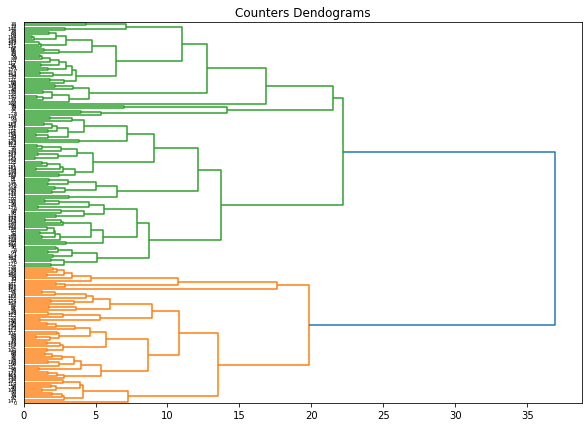

In [110]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy.iloc[:, 2:] , method='ward'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [111]:
#training
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=4)
hc.fit_predict(df_copy.iloc[:, 2:])

array([0, 2, 2, 2, 2, 2, 2, 1, 3, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2,
       0, 3, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 3, 2, 0, 0, 0, 2, 0,
       2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1,
       0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 3, 2, 2, 0, 1, 1, 2, 1, 2,
       2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0,
       1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 3, 2, 0, 0, 2, 2,
       0, 0, 0], dtype=int64)

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [112]:
from sklearn.decomposition import PCA
pca = PCA()

In [113]:
pca.fit(df_copy.iloc[:, 2:])

PCA()

In [114]:
transformed = pca.transform(df_copy.iloc[:, 2:])

array([0, 2, 2, 2, 2, 2, 2, 1, 3, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 0, 2,
       0, 3, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 3, 2, 0, 0, 0, 2, 0,
       2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1,
       0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 3, 2, 2, 0, 1, 1, 2, 1, 2,
       2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0,
       1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 3, 2, 0, 0, 2, 2,
       0, 0, 0], dtype=int64)

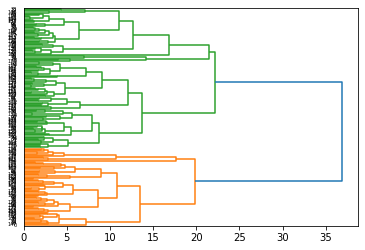

In [115]:
dend = shc.dendrogram(shc.linkage(y=transformed, method='ward'),orientation='right')
hc.fit_predict(df_copy.iloc[:, 2:])